# <h1><center>**`Expected Loss`**</center></h1>

In [1]:
import numpy as np
import pandas as pd

In [3]:
pd.options.display.max_rows= None

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
load_data_inputs_train=pd.read_csv('loan_data_inputs_train.csv',index_col=0)
load_data_targets_train=pd.read_csv('loan_data_targets_train.csv',index_col=0)
load_data_inputs_test=pd.read_csv('loan_data_inputs_test.csv',index_col=0)
load_data_targets_test=pd.read_csv('loan_data_targets_test.csv',index_col=0)

In [9]:
load_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [11]:
load_data_inputs_train.shape

(373028, 338)

In [13]:
load_data_targets_train.shape

(373028, 1)

In [15]:
load_data_inputs_train['outcome'] = load_data_targets_train

In [17]:
load_data_inputs_train['outcome'].value_counts()

outcome
1    332250
0     40778
Name: count, dtype: int64

In [19]:
load_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:25-30,dti:30-35,dti:35-40,dti:>40,mths_since_last_record:Missing,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,outcome
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,0,1,0,0,0,0,1
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,0,1,0,0,0,0,1
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,0,1,0,0,0,0,1
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,1,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,0,1,0,0,0,0,0


In [21]:
load_data_defaults= load_data_inputs_train[load_data_inputs_train['outcome']==0]                                                                               #taking only defaults

In [23]:
load_data_defaults.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:25-30,dti:30-35,dti:35-40,dti:>40,mths_since_last_record:Missing,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,outcome
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,1,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,0,1,0,0,0,0,0
454638,454638,10494891,12367014,20000,20000,20000.0,36 months,11.99,664.20,B,...,0,0,0,0,1,0,0,0,0,0
222888,222888,1197171,1438165,8500,8500,8500.0,36 months,8.90,269.91,A,...,0,0,0,0,1,0,0,0,0,0
377139,377139,17523141,19645687,4850,4850,4850.0,36 months,16.99,172.90,D,...,1,0,0,0,1,0,0,0,0,0


In [25]:
load_data_defaults.isna().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3046
emp_length                                                          2215
home_ownership                                     

In [27]:
feature_selection=[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NC_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
    'purpose:educ_sm_b_wedd_ren_en_mov_house',
    'purpose:small_business',
    'purpose:educational',
    'purpose:renewable_energy',
    'purpose:moving',
    'purpose:house',
    'purpose:other',
    'purpose:medical',
    'purpose:wedding',
    'purpose:vacation',
    'purpose:debt_consolidation',
    'purpose:home_improvement',
    'purpose:major_purchase',
    'purpose:car',
    'purpose:credit_card',
    'initial_list_status:f',
    'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issued_date:<38',
'mths_since_issued_date:38-39',
'mths_since_issued_date:40-41',
'mths_since_issued_date:42-48',
'mths_since_issued_date:49-52',
'mths_since_issued_date:53-64',
'mths_since_issued_date:65-84',
'mths_since_issued_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:140-239',
    'mths_since_earliest_cr_line:240-339',
    'mths_since_earliest_cr_line:340-439',
    'mths_since_earliest_cr_line:440-539',
    'mths_since_earliest_cr_line:540-600',
    'mths_since_earliest_cr_line:>600',
    'delinq_2yrs:0',
    'delinq_2yrs:0-3',
    'delinq_2yrs:3-7',
    'delinq_2yrs:7-9',
    'delinq_2yrs:9-11',
    'delinq_2yrs:11-12',
    'delinq_2yrs:12-18',
    'delinq_2yrs:>18',
    'inq_last_6mths:0',
    'inq_last_6mths:0-3',
    'inq_last_6mths:3-7',
    'inq_last_6mths:7-9',
    'inq_last_6mths:9-11',
    'inq_last_6mths:11-12',
    'inq_last_6mths:12-18',
    'inq_last_6mths:18',
    'open_acc:=0',
    'open_acc:0-1',
    'open_acc:1-4',
    'open_acc:4-28',
    'open_acc:28-35',
    'open_acc:35-45',
    'open_acc:>45',
    'pub_rec:0-3',
    'pub_rec:3-6',
    'pub_rec:6-8',
    'pub_rec:8',
    'total_acc:<0',
    'total_acc:0-4',
    'total_acc:4-62',
    'total_acc:62-72',
    'total_acc:72-85',
    'total_acc:>85',
    'acc_now_delinq:<0',
    'acc_now_delinq:0-1',
    'acc_now_delinq:1-2',
    'acc_now_delinq:2-3',
    'acc_now_delinq:3-5',
    'acc_now_delinq:>5',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'total_rev_hi_lim:<=5k',
'total_rev_hi_lim:5k_10k',
'total_rev_hi_lim:10k_20k',
'total_rev_hi_lim:20k_30k',
'total_rev_hi_lim:30k_40k',
'total_rev_hi_lim:40k_50k',
'total_rev_hi_lim:50k_65k',
'total_rev_hi_lim:65k_80k',
'total_rev_hi_lim:>80k',
'dti:<5',
'dti:5-10',
'dti:10-15',
'dti:15-20',
'dti:20-25',
'dti:25-30',
'dti:30-35',
'dti:35-40',
'dti:>40',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-90',
'mths_since_last_record:90-120',
'mths_since_last_record:120-127',
'mths_since_last_record:>=127','loan_amnt','funded_amnt','int_rate','installment','recoveries','total_rec_prncp']



In [29]:
load_data_defaults=load_data_defaults.reindex(feature_selection, axis='columns')

In [31]:
load_data_defaults.isna().sum()

grade:A                                    0
grade:B                                    0
grade:C                                    0
grade:D                                    0
grade:E                                    0
grade:F                                    0
grade:G                                    0
home_ownership:RENT_OTHER_NONE_ANY         0
home_ownership:OWN                         0
home_ownership:MORTGAGE                    0
addr_state:ND_NE_IA_NC_FL_HI_AL            0
addr_state:NM_VA                           0
addr_state:OK_TN_MO_LA_MD_NC               0
addr_state:UT_KY_AZ_NJ                     0
addr_state:AR_MI_PA_OH_MN                  0
addr_state:RI_MA_DE_SD_IN                  0
addr_state:GA_WA_OR                        0
addr_state:WI_MT                           0
addr_state:IL_CT                           0
addr_state:KS_SC_CO_VT_AK_MS               0
addr_state:WV_NH_WY_DC_ME_ID               0
verification_status:Verified               0
verificati

### Recovery Rate:
It is the recovered amount divided by the funded amount

In [33]:
load_data_defaults['recovery_rate'] = load_data_defaults['recoveries']/load_data_defaults['funded_amnt']

In [35]:
load_data_defaults['recovery_rate'].describe()

count    40778.000000
mean         0.051739
std          0.085882
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101866
max          1.207630
Name: recovery_rate, dtype: float64

In [37]:
load_data_defaults['recovery_rate'] = np.where(load_data_defaults['recovery_rate'] > 1,1,load_data_defaults['recovery_rate'])
load_data_defaults['recovery_rate'] = np.where(load_data_defaults['recovery_rate'] < 0,0,load_data_defaults['recovery_rate'])

In [39]:
load_data_defaults['recovery_rate'].describe()

count    40778.000000
mean         0.051702
std          0.085447
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101866
max          1.000000
Name: recovery_rate, dtype: float64

### The credit conversion factor (CCF) converts the amount of a free credit line and other off-balance-sheet transactions (with the exception of derivatives) to an EAD (exposure at default) amount.

In [41]:
load_data_defaults['CCF'] = (load_data_defaults['funded_amnt'] - load_data_defaults['total_rec_prncp']) / load_data_defaults['funded_amnt']

In [43]:
load_data_defaults['CCF'].describe()

count    40778.000000
mean         0.719456
std          0.204450
min          0.000000
25%          0.608267
50%          0.769332
75%          0.876847
max          1.000000
Name: CCF, dtype: float64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

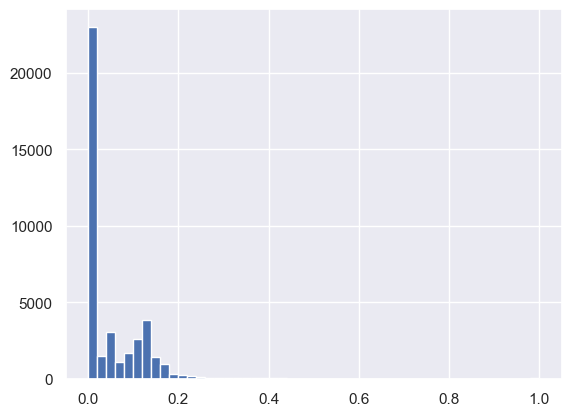

In [47]:
plt.hist(load_data_defaults['recovery_rate'],bins=50)
plt.show()

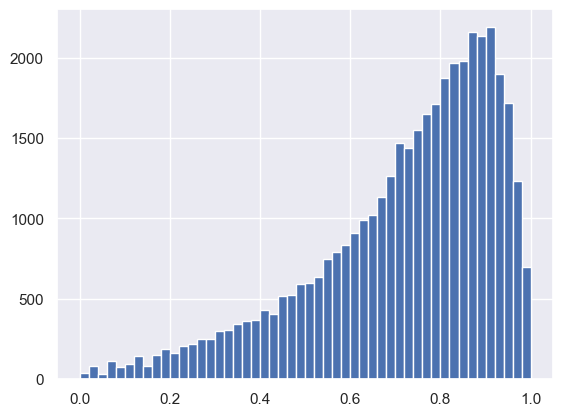

In [49]:
plt.hist(load_data_defaults['CCF'],bins=50)
plt.show()

In [51]:
load_data_defaults['recovery_rate_0_1']  = np.where(load_data_defaults['recovery_rate'] == 0,0,1)

In [53]:
load_data_defaults['recovery_rate_0_1'].value_counts()

recovery_rate_0_1
0    21276
1    19502
Name: count, dtype: int64

# LGD_Model

In LGD model we will basically create 2 models for determining the recovery rate if the recovery rate is 0 or greater than 0:

1.we will create a logistic regression model for determining whether the recovery rate is 0 or 1.

2.For all the recovery rate greater than 0 we will create a linear regression model to determine how much greater than 0 the value of recovery rate is.

#### Doing The First part: Stage_1

In [55]:
load_data_defaults.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE',
       ...
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'recoveries', 'total_rec_prncp', 'recovery_rate', 'CCF',
       'recovery_rate_0_1'],
      dtype='object', length=157)

In [57]:
from sklearn.model_selection import train_test_split

lgd_input_train,lgd_input_test,lgd_target_train,lgd_target_test = train_test_split(load_data_defaults.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),load_data_defaults['recovery_rate_0_1'],test_size=0.2,random_state=42)

In [59]:
ref_categories=['grade:G',
               'home_ownership:RENT_OTHER_NONE_ANY',
               'addr_state:ND_NE_IA_NC_FL_HI_AL',
               'verification_status:Verified',
                'purpose:educ_sm_b_wedd_ren_en_mov_house',
                'initial_list_status:f',
                'term:60',
                'emp_length:0',
                'mths_since_issued_date:>84',
                'int_rate:20.281',
                'mths_since_earliest_cr_line:<140',
                'delinq_2yrs:>18',
                'inq_last_6mths:7-9',
                'open_acc:=0',
                'pub_rec:0-3',
                'total_acc:>85',
                'acc_now_delinq:<0',
                'total_rev_hi_lim:<=5k',
                'annual_inc:<20k',
                'dti:>40',
                'mths_since_last_delinq:0-3',
                'mths_since_last_record:Missing'
               ]

In [61]:
lgd_input_train = lgd_input_train.drop(ref_categories,axis=1)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [65]:
reg =LogisticRegression(max_iter=200)                                               

In [67]:
lgd_input_train.shape

(32622, 131)

In [69]:
lgd_target_train.shape

(32622,)

In [71]:
reg.fit(lgd_input_train,lgd_target_train)

LogisticRegression(max_iter=200)

In [73]:
lgd_input_test.shape

(8156, 153)

In [75]:
lgd_input_test = lgd_input_test.drop(ref_categories,axis=1)

In [77]:
lgd_input_test.shape

(8156, 131)

In [79]:
pred = reg.predict(lgd_input_test)

In [81]:
prob_pred = reg.predict_proba(lgd_input_test)[:][:,1]

In [83]:
df_actual_predicted_probs = pd.DataFrame()

In [85]:
df_actual_predicted_probs['lgd_test_outcome'] =pred
df_actual_predicted_probs['lgd_test_proba'] = prob_pred

In [87]:
df_actual_predicted_probs.head()

,lgd_test_outcome,lgd_test_proba
0,1,0.706617
1,0,0.476334
2,0,0.463241
3,1,0.675896
4,0,0.469370


In [89]:
df_actual_predicted_probs.shape

(8156, 2)

In [91]:
metrics.confusion_matrix(lgd_target_test,pred)

array([[2852, 1379],
       [1169, 2756]])

In [93]:
metrics.accuracy_score(lgd_target_test,pred)

0.687591956841589

In [95]:
import pickle

In [97]:
pickle.dump(reg,open('lgd_stage_1.sav','wb'))

stage-2...where >0 linear reg to determine how much >0   for recovery rate

Stage_2:Take those records where recovery_rate_0_1 is 1 and determine the recovery_rate by Linear REG

In [99]:
lgd_loan_data_2 = load_data_defaults[load_data_defaults['recovery_rate_0_1'] == 1]

In [103]:
lgd_loan_data_2.shape

(19502, 157)

In [105]:
lgd_input_train_2,lgd_input_test_2,lgd_target_train_2,lgd_target_test_2 = train_test_split(lgd_loan_data_2.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),lgd_loan_data_2['recovery_rate'],test_size=0.2,random_state=42)

In [107]:
lgd_input_train_2 =lgd_input_train_2.drop(ref_categories,axis=1)

In [109]:
from sklearn.linear_model import LinearRegression

In [111]:
lin_reg =LinearRegression()

In [113]:
lin_reg.fit(lgd_input_train_2,lgd_target_train_2)

LinearRegression()

In [115]:
lgd_input_test_2 = lgd_input_test_2.drop(ref_categories,axis=1)

In [117]:
lgd_input_test_2.shape

(3901, 131)

In [119]:
pred_lin = lin_reg.predict(lgd_input_test_2)

In [121]:
pred_lin

array([0.13567379, 0.06718956, 0.09462008, ..., 0.12465915, 0.07248101,
       0.08528765])

In [123]:
metrics.r2_score(lgd_target_test_2,pred_lin)

0.12478323688474668

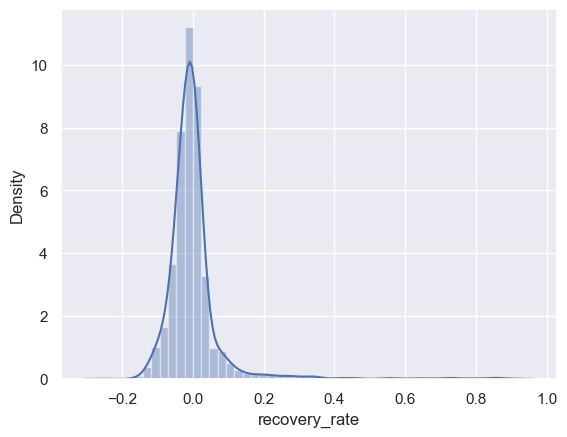

In [125]:
sns.distplot(lgd_target_test_2-pred_lin)

plt.show()

In [127]:
pickle.dump(lin_reg,open('lgd_stage_2.sav','wb'))

# combination of stage1 and stage2

we will multiply the results of stage_1 and stage_2

In [129]:
pred_stage_2_all = lin_reg.predict(lgd_input_test)

In [131]:
pred_stage_2_all

array([0.06618586, 0.04787434, 0.15914674, ..., 0.07241948, 0.10081735,
       0.14634088])

In [133]:
print(len(pred),len(pred_stage_2_all))

8156 8156


In [135]:
pred_lgd_final = pred * pred_stage_2_all

In [137]:
pred_lgd_final

array([0.06618586, 0.        , 0.        , ..., 0.07241948, 0.10081735,
       0.        ])

In [139]:
pd.DataFrame(pred_lgd_final).describe()

,0
count,8156.000000
mean,0.052738
std,0.056667
min,0.000000
25%,0.000000
50%,0.042000
75%,0.105420
max,0.294530


# EAD MODEL

In [141]:
load_data_defaults.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE',
       ...
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'recoveries', 'total_rec_prncp', 'recovery_rate', 'CCF',
       'recovery_rate_0_1'],
      dtype='object', length=157)

In [143]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(load_data_defaults.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),load_data_defaults['CCF'],test_size=0.2,random_state=42) 

In [145]:
ead_inputs_train =ead_inputs_train.drop(ref_categories,axis=1)

In [147]:
reg_ead =LinearRegression()
reg_ead.fit(ead_inputs_train,ead_targets_train)


LinearRegression()

In [149]:
ead_inputs_test = ead_inputs_test.drop(ref_categories,axis=1)

In [151]:
y_pred_test_ead =reg_ead.predict(ead_inputs_test)

In [153]:
y_pred_test_ead

array([0.55958399, 0.37705677, 0.90225855, ..., 0.66296642, 0.89692882,
       0.89477416])

<Axes: xlabel='CCF', ylabel='Density'>

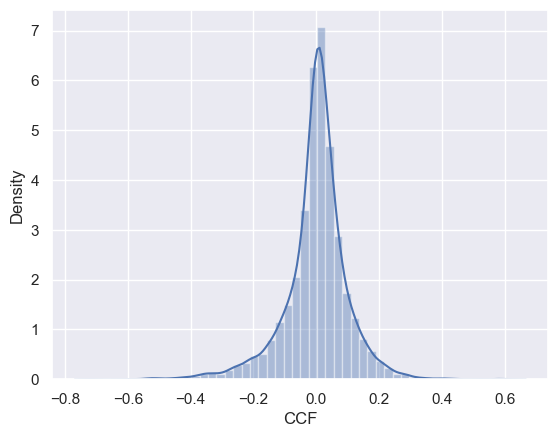

In [155]:
sns.distplot(ead_targets_test-y_pred_test_ead)

In [157]:
pd.DataFrame(y_pred_test_ead).describe()

,0
count,8156.000000
mean,0.720407
std,0.174406
min,-0.602701
25%,0.634794
50%,0.731027
75%,0.832212
max,1.286389


We see that some values are negitive and this predicted value is of CCF...so it can't be negitive

In [159]:
y_pred_test_ead = np.where(y_pred_test_ead < 0,0,y_pred_test_ead)
y_pred_test_ead = np.where(y_pred_test_ead > 1,1,y_pred_test_ead)

In [161]:
pickle.dump(reg_ead,open('ead_model.sav','wb'))

In [163]:
pd.DataFrame(y_pred_test_ead).describe()

,0
count,8156.000000
mean,0.719043
std,0.166765
min,0.000000
25%,0.634794
50%,0.731027
75%,0.832212
max,1.000000


# Calculating EL:

### Expected Loss = PD * LGD * EAD

In [165]:
lgd_input_test.shape

(8156, 131)

In [167]:
lgd_target_test.shape

(8156,)

In [169]:
testing_sample = lgd_input_test

In [171]:
testing_sample.shape

(8156, 131)

In [173]:
testing_outcome = pd.DataFrame()

In [175]:
testing_outcome['recovery_rate_stage_1'] = reg.predict(testing_sample)
testing_outcome['recovery_rate_stage_2'] = lin_reg.predict(testing_sample)

In [177]:
testing_outcome['recovery_rate'] = testing_outcome['recovery_rate_stage_1'] * testing_outcome['recovery_rate_stage_2'] 

In [179]:
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate
0,1,0.066186,0.066186
1,0,0.047874,0.000000
2,0,0.159147,0.000000
3,1,0.057790,0.057790
4,0,0.094851,0.000000


In [181]:
testing_outcome['recovery_rate'] =np.where(testing_outcome['recovery_rate'] < 0,0,testing_outcome['recovery_rate'])
testing_outcome['recovery_rate'] = np.where(testing_outcome['recovery_rate'] > 1,1,testing_outcome['recovery_rate'])

In [183]:
testing_outcome['LGD'] = 1-testing_outcome['recovery_rate']
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD
0,1,0.066186,0.066186,0.933814
1,0,0.047874,0.000000,1.000000
2,0,0.159147,0.000000,1.000000
3,1,0.057790,0.057790,0.942210
4,0,0.094851,0.000000,1.000000


In [185]:
testing_outcome['LGD'].describe()

count    8156.000000
mean        0.947262
std         0.056667
min         0.705470
25%         0.894580
50%         0.958000
75%         1.000000
max         1.000000
Name: LGD, dtype: float64

In [187]:
testing_outcome['CCF'] = reg_ead.predict(testing_sample)

In [189]:
testing_outcome['CCF'].describe()

count    8156.000000
mean        0.720407
std         0.174406
min        -0.602701
25%         0.634794
50%         0.731027
75%         0.832212
max         1.286389
Name: CCF, dtype: float64

In [191]:
testing_outcome['CCF'] =np.where(testing_outcome['CCF'] < 0,0,testing_outcome['CCF'])
testing_outcome['CCF'] = np.where(testing_outcome['CCF'] > 1,1,testing_outcome['CCF'])

In [193]:
testing_outcome['CCF'].describe()

count    8156.000000
mean        0.719043
std         0.166765
min         0.000000
25%         0.634794
50%         0.731027
75%         0.832212
max         1.000000
Name: CCF, dtype: float64

In [195]:
testing_outcome.shape

(8156, 5)

In [197]:
testing_sample.shape

(8156, 131)

In [199]:
testing_outcome['EAD'] = testing_outcome['CCF'] * testing_sample['funded_amnt'].values

In [201]:
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820
1,0,0.047874,0.000000,1.000000,0.377057,4524.681272
2,0,0.159147,0.000000,1.000000,0.902259,15631.629299
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819


In [203]:
testing_outcome['EAD'].describe()

count     8156.000000
mean     10727.507775
std       7520.667245
min          0.000000
25%       5047.833926
50%       8699.416475
75%      14500.978291
max      35000.000000
Name: EAD, dtype: float64

## Calculate results of PD_Model

In [207]:
testing_sample.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:NM_VA',
       'addr_state:OK_TN_MO_LA_MD_NC',
       ...
       'mths_since_last_delinq:>=57', 'mths_since_last_record:0-90',
       'mths_since_last_record:90-120', 'mths_since_last_record:120-127',
       'mths_since_last_record:>=127', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'total_rec_prncp'],
      dtype='object', length=131)

### Make sure you pass only those columns to the PD_Model which you have passed in PD_Model while model training

In [209]:
testing_sample.drop('total_rec_prncp',axis=1,inplace=True)

In [211]:
reg_pd = pickle.load(open('pd_model_gradient.sav','rb'))

In [213]:
reg_pd.predict_proba(testing_sample)[:][:,0]

array([0.13483018, 0.13483018, 0.13483018, ..., 0.13483018, 0.13483018,
       0.10832582])

In [215]:
testing_outcome['PD'] = reg_pd.predict_proba(testing_sample)[:][:,0]

In [217]:
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.134830
1,0,0.047874,0.000000,1.000000,0.377057,4524.681272,0.134830
2,0,0.159147,0.000000,1.000000,0.902259,15631.629299,0.134830
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.094999
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.127204


In [219]:
testing_outcome['PD'].describe()

count    8156.000000
mean        0.116843
std         0.016834
min         0.094999
25%         0.094999
50%         0.112397
75%         0.134830
max         0.134830
Name: PD, dtype: float64

In [221]:
testing_outcome['EL'] =testing_outcome['PD']*testing_outcome['LGD']*testing_outcome['EAD']

In [223]:
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD,EL
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.134830,1056.827483
1,0,0.047874,0.000000,1.000000,0.377057,4524.681272,0.134830,610.063589
2,0,0.159147,0.000000,1.000000,0.902259,15631.629299,0.134830,2107.615388
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.094999,230.001530
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.127204,602.827643


In [225]:
testing_outcome['Funded_amt'] = testing_sample['funded_amnt'].values

In [227]:
testing_outcome.head()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD,EL,Funded_amt
0,1,0.066186,0.066186,0.933814,0.559584,8393.759820,0.134830,1056.827483,15000
1,0,0.047874,0.000000,1.000000,0.377057,4524.681272,0.134830,610.063589,12000
2,0,0.159147,0.000000,1.000000,0.902259,15631.629299,0.134830,2107.615388,17325
3,1,0.057790,0.057790,0.942210,0.513916,2569.582343,0.094999,230.001530,5000
4,0,0.094851,0.000000,1.000000,0.621515,4739.051819,0.127204,602.827643,7625


In [229]:
testing_outcome_final =testing_outcome[['Funded_amt','PD','LGD','EAD','EL']]
testing_outcome_final.head()

,Funded_amt,PD,LGD,EAD,EL
0,15000,0.134830,0.933814,8393.759820,1056.827483
1,12000,0.134830,1.000000,4524.681272,610.063589
2,17325,0.134830,1.000000,15631.629299,2107.615388
3,5000,0.094999,0.942210,2569.582343,230.001530
4,7625,0.127204,1.000000,4739.051819,602.827643


record:0---When the Funded amount is 15000 the bank suffers a loss of 2117.6 from that customer..

record:1---When the Funded amount is 12000 the bank suffers a loss of 1036.1 from that customer..

record:3---When the Funded amount is 17325 the bank suffers a loss of 4657.0 from that customer..


and so on......



## We will get the overall expected_loss suffered by the bank

In [231]:
testing_outcome_final['EL'].sum()/testing_outcome_final['Funded_amt'].sum()

0.08333168868908597

We observe that the Bank suffers an Expected loss of 8.3% while giving loans to it's customers

#observed EL is between 2% to 15% based on this banks can be aggressive or lenient while giving loans